Importing libraries

In [1]:
import numpy as np
import librosa
import datetime
import matplotlib.pyplot as plt

from moviepy.editor import *

Defining support function

In [10]:
def next_pow_2(x):
    """Smallest next power of two of a given value x."""
    return 1 << (x - 1).bit_length()

def compute_reference_timestamps(hop_size, number_of_frames, sample_rate): # probably wrong?
  # TODO: insert your code here.

  timestamps = [0]*number_of_frames
    
  for i in range(1, number_of_frames):
    
    timestamps[i] = (i*sample_rate) + 1 #-hop_size

  return np.array(timestamps) # return a list of reference timestamps.

Set video/audio path (can be done iteratively on multiple files, this is just for a single example)

In [3]:
VIDEO_PATH = "/Users/daniele/Documents/MMSR_Experiments/training1.mp4"

# Uncomment these lines if you need to extract audio from video

#video = VideoFileClip(VIDEO_PATH)
#audio = video.audio
#audio.write_audiofile("training1_audio.wav")

AUDIO_PATH = "/Users/daniele/Documents/MMSR_Experiments/training1_audio.wav"

Sample the audio file

In [4]:
sample_rate = 8000

audio_signal, sample_rate = librosa.core.load(AUDIO_PATH, sr = sample_rate)

assert len(np.shape(audio_signal)) == 1, 'mono signal expected'

audio_number_of_samples = len(audio_signal)
audio_duration = float(audio_number_of_samples) / float(sample_rate)

print('number of samples: %d' % audio_number_of_samples)
print('sample rate: %d' % sample_rate)
print('duration: %s' % datetime.timedelta(seconds=audio_duration))

number of samples: 31660560
sample rate: 8000
duration: 1:05:57.570000


Define RMS sliding window parameters (frame length and overlap size)

In [5]:
print('Audio RMS level')

# Sliding window analysis parameters.
audio_frame_size = next_pow_2(int(sample_rate / 1.0))  # i.e., about 1.0 second.
audio_hop_size = int(audio_frame_size / 2.0)  # i.e., 50% overlap.
print(' - sliding window analysis')
print('   frame size: %d' % audio_frame_size)
print('   hop size: %d' % audio_hop_size)

Audio RMS level
 - sliding window analysis
   frame size: 8192
   hop size: 4096


Compute RMS level vector

In [11]:
audio_rms_level = librosa.feature.rms(audio_signal, frame_length=audio_frame_size, hop_length=audio_hop_size).flatten()

In [12]:
audio_rms_level_number_of_frames = len(audio_rms_level) # TODO: replace -1 by the correct value.
print('audio RMS level vector size: %d' % audio_rms_level_number_of_frames)

audio RMS level vector size: 7730


Plot the RMS level per timestamp

61832001


<IPython.core.display.Javascript object>


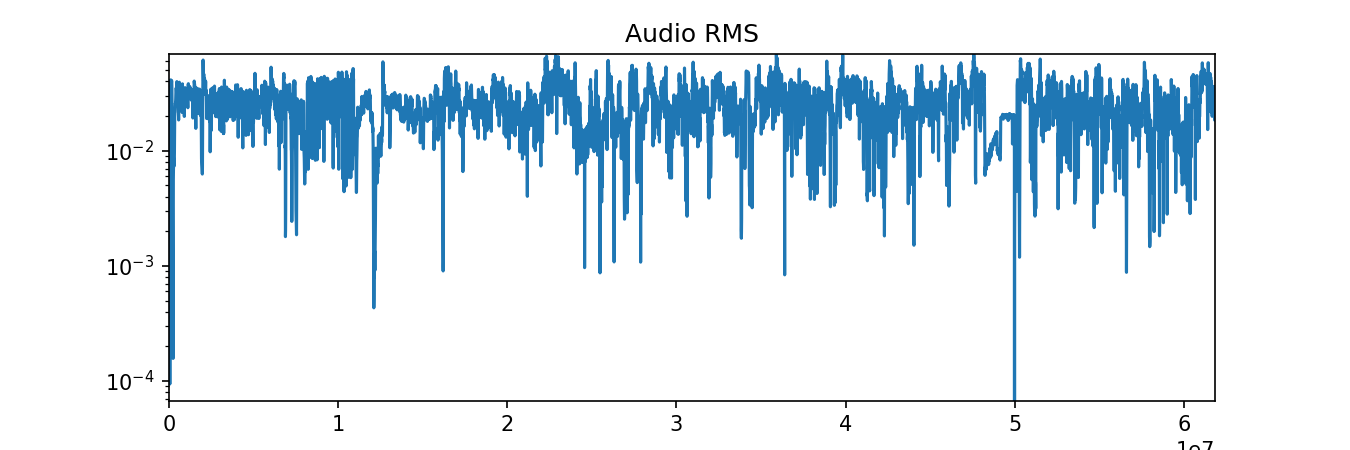

In [13]:
# Compute the reference timestamps.
audio_rms_level_timestamps = compute_reference_timestamps(audio_hop_size, audio_rms_level_number_of_frames, sample_rate)

print(audio_rms_level_timestamps[-1])
# Check that the function creates one timestamp per frame.
assert len(audio_rms_level_timestamps) == audio_rms_level_number_of_frames

%matplotlib notebook

# Plot the RMS values.
plt.figure(figsize=(9,3))
plt.semilogy(audio_rms_level_timestamps, audio_rms_level)
plt.xlim([min(audio_rms_level_timestamps), max(audio_rms_level_timestamps)])
plt.ylim([min(audio_rms_level), max(audio_rms_level)])
plt.title('Audio RMS')
plt.show()

In [9]:
print(audio_rms_level_timestamps)

[       0     8000    16000 ... 61816000 61824000 61832000]
